# Geopandas Exercise
* Create a geodataframe from a CSV file with coordinate columns
* Create a geodataframe from a shapefile
* Exploring and Plotting geodataframes
* Attribute subset
* Dissolving features
* Spatial subsets
* Spatial joins

In [159]:
#Read in the packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import arcgis
import numpy as np

### 1. Fetching and exploring spatial data 
► **Q1.1** Read the `Permitted_Animal_Facilities.csv` file into a geodataframe called `gdf_animal`. Assume the coordinate columns (`Location Lat Num` and `Location Long Num`) use the NAD 1983 coordinate reference system (WKID/EPSG = 4269). 

In [123]:
#Read the CSV into a Pandas dataframe
df_animal=pd.read_csv('../data/Permitted_Animal_Facilities.csv')
#Construct geometries from the dataframe's coordinate columns
thePoints = [Point(xy) for xy in zip(gdf_animal['Location Long Num'],gdf_animal['Location Lat Num'])]
#Create a geodataframe from the dataframe, the geometry, and the coordinate reference system
theCRS = 4326

gdf_animal = gpd.GeoDataFrame(
    df_animal,      #Source of the data
    geometry=thePoints, #Field containing geometries
    crs=theCRS)   

gdf_animal.head()
len(gdf_animal)

2545

► **Q1.2** Plot the geodataframe as a simple point map.

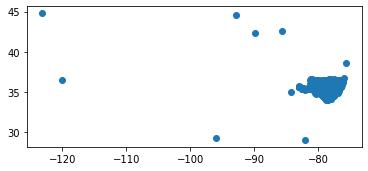

In [81]:
#Plot the geodataframe as simple points
gdf_animal.plot();

► **Q1.3** Subset points where values in the `State` column equal "NC" into a new dataframe called `gdf_animals_nc`. 

In [86]:
#Subset NC records
mask_NC = gdf_animal['State']=="NC"
gdf_animal_nc = gdf_animal.loc[mask_NC]
len(dfNC)

2450

► **Q1.4** Plot the subset features. For full credit:
 * Assign different colors to each unique value in the `Permit Type` column
 * Use the `Set3` color map
 * Draw markers something other than the default, using an opacity of 0.4
 * Set the figuire size to 12 x 6

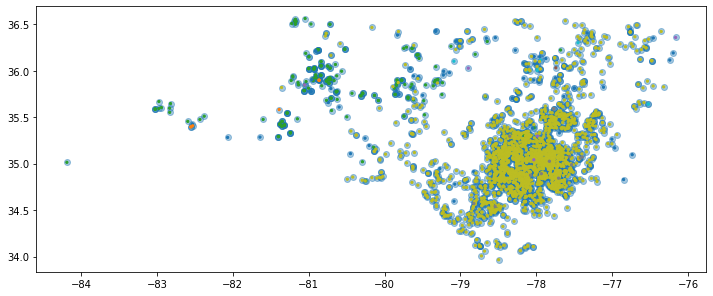

In [87]:
#Plot the NC records
ax=gdf_animal_nc.plot(figsize = (12,6),alpha=0.4)
gdf_animal_nc.plot(column='Permit Type', ax=ax, markersize=5);

► **Q4** Read the `HUC12.shp` shapefile into a geodataframe named `gdf_HUC12`

In [141]:
#Read in the HUC12 feature class
theShapefile = '../data/HUC12.shp'
df_HUC12 = pd.DataFrame.spatial.from_featureclass(theShapefile)
SHAPES=df_HUC12['SHAPE']
theCRS = 4326
gdf_HUC12 = gpd.GeoDataFrame(
    df_HUC12,      #Source of the data
    geometry=SHAPES, #Field containing geometries
    crs=theCRS)   

gdf_HUC12.head()

,index,OBJECTID_2,OBJECTID,HUC_8,HUC_10,HUC_12,ACRES,NCONTRB_A,HU_10_GNIS,HU_12_GNIS,...,GlobalID,SHAPE_Leng,GAZ_ID,WBD_Date,VPUID,Shape_Le_1,Shape_STAr,Shape_STLe,SHAPE,geometry
0,0,80221,0,03040103,0304010305,030401030503,15414.0,0.0,,,...,{49700E7B-2092-4648-976D-BDB9C5828120},0.458995,-396686,2012-02-01,03N,0.458990,0.006196,0.458990,"{""rings"": [[[-79.88965123981285, 35.4799540524...","MULTIPOLYGON (((-79.88965 35.47995, -79.89022 ..."
1,1,80224,1,03040103,0304010306,030401030605,42390.0,0.0,,,...,{5D9D8475-EF89-47D5-B539-C51B21C8EA21},0.842864,-396689,2012-02-01,03N,0.842860,0.017037,0.842860,"{""rings"": [[[-80.06735036572678, 35.5602713631...","MULTIPOLYGON (((-80.06735 35.56027, -80.06718 ..."
2,2,80232,2,03040101,0304010115,030401011503,32998.0,0.0,,,...,{D68009C4-D9F3-4CC0-BC3C-97292F45B03F},0.634131,-396697,2012-02-01,03N,0.634128,0.013327,0.634128,"{""rings"": [[[-80.36849110927722, 35.9302859922...","MULTIPOLYGON (((-80.36849 35.93029, -80.36791 ..."
3,3,80239,3,03040101,0304010114,030401011404,29297.0,0.0,,,...,{B0512CF1-8244-4B7B-9D06-5ADC80F183C1},0.638612,-396704,2012-02-01,03N,0.638611,0.011836,0.638611,"{""rings"": [[[-80.44931667272624, 35.9385458029...","MULTIPOLYGON (((-80.44932 35.93855, -80.44910 ..."
4,4,80308,4,03040104,0304010401,030401040101,14822.0,0.0,,,...,{68CC51D1-5142-4747-A1DA-85A8637FE991},0.395076,-396773,2012-02-01,03N,0.395076,0.005911,0.395076,"{""rings"": [[[-80.32812167487538, 34.8771713596...","MULTIPOLYGON (((-80.32812 34.87717, -80.32803 ..."


► **Q5** Show whether the HUC_12 geodataframes has the same coordinate reference system as the Animal Permit one.

In [131]:
#Reveal whether this and the animal permit geodataframe  
# share the same coordinate reference system
gdf_HUC12.crs==gdf_animal.crs

True

► **Q6** Plot the features so that each HUC_10 appears as a different color

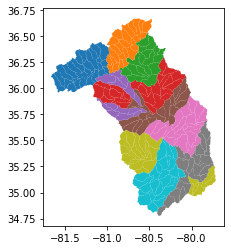

In [135]:
#Plot the features, showing HUC_10s as different colors
gdf_HUC12.plot("HUC_10");

► **Q7** Dissolve HUC_12 features based on the HUC_10 attribute, naming the output `gdf_HUC10`. The output should include the sum of the `ACRES` column and the first `HU_10_NAME` value. 

In [167]:
#Dissolve HUC12 features on the HUC_10 attributes & display
gdf_HUC10= gdf_HUC12.dissolve('HUC_10',aggfunc={'ACRES':'sum','HU_10_NAME':'first'})
gdf_HUC10.head()

,geometry,ACRES,HU_10_NAME
HUC_10,,,
0304010101,"POLYGON ((-81.39655 36.05652, -81.39622 36.056...",112698.0,Headwaters Yadkin River
0304010102,"POLYGON ((-81.31415 36.00443, -81.31416 36.004...",120847.0,W Kerr Scott Reservoir-Yadkin River
0304010103,"POLYGON ((-81.14146 36.05536, -81.14154 36.055...",134933.0,Reddies River-Yadkin River
0304010104,"POLYGON ((-81.00502 36.14152, -81.00515 36.141...",117712.0,Roaring River-Yadkin River
0304010105,"POLYGON ((-80.78422 36.39568, -80.78405 36.395...",69230.0,Mitchell River


► **Q8** Subset the animal permit locations that fall within the HUC_10 features. Save the output as `gdf_HUC_animals`

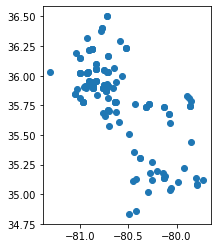

In [168]:
#Intersect the two dataframes
gdf_HUC_animals = gpd.overlay(
    df1=gdf_animal,
    df2=gdf_HUC10,
    how='intersection'
)
#Plot
gdf_HUC_animals.plot();

In [169]:
gdf_HUC_animals.head()

,Permit Number,Facility Name,Combined Owner,Regulated Operation,Permit Type,Regulated Activity,Allowable Count,Number Of Lagoons,Issued Date,Effective Date,...,Location Lat Num,Location Long Num,Address 1,Address 2,City,State,Zip,ACRES,HU_10_NAME,geometry
0,AWC020004,Alan Smith Dairy Farm,Gar Smith,Cattle,Cattle State COC,Cattle - Milk Cow,400.0,1.0,12-19-2019,12-19-2019,...,35.847885,-81.054686,1210 Smith Farm Rd,NaN,Stony Point,NC,286789443.0,64416.0,Third Creek,POINT (-81.05469 35.84788)
1,AWC490016,Fred Sutton Farm,Fred Sutton,Cattle,Cattle State COC,Cattle - Milk Cow,450.0,1.0,10-01-2019,10-01-2019,...,35.813300,-81.003300,433 Old Miller Rd,NaN,Statesville,NC,28625.0,64416.0,Third Creek,POINT (-81.00330 35.81330)
2,AWC800016,Osborne Dairy,G & M Milling Co Inc,Cattle,Cattle State COC,Cattle - Dairy Calf,20.0,1.0,10-01-2014,10-01-2014,...,35.775300,-80.635800,385 Hamps Dairy Rd,NaN,Cleveland,NC,270139190.0,64416.0,Third Creek,POINT (-80.63580 35.77530)
3,AWC800016,Osborne Dairy,G & M Milling Co Inc,Cattle,Cattle State COC,Cattle - Dairy Heifer,50.0,1.0,10-01-2014,10-01-2014,...,35.775300,-80.635800,385 Hamps Dairy Rd,NaN,Cleveland,NC,270139190.0,64416.0,Third Creek,POINT (-80.63580 35.77530)
4,AWC800016,Osborne Dairy,G & M Milling Co Inc,Cattle,Cattle State COC,Cattle - Dry Cow,20.0,1.0,10-01-2014,10-01-2014,...,35.775300,-80.635800,385 Hamps Dairy Rd,NaN,Cleveland,NC,270139190.0,64416.0,Third Creek,POINT (-80.63580 35.77530)


► **Challenge question**: The `gdf_HUC_animals` dataframe now includes the HUC 10 name (in the `HU_10_NAME` attribute) for each animal permit location. We can now count the total number of animal permits in each HUC 10. Furthermore, because the Animal Permit data includes an attribute of the number of animals (`Allowable Count` attribute), we can also compute the total number of permitted animals for each HUC 12.

With this information, see if you can:
* **C1** Create a bar plot showing the number of permits by HUC 10
 * ***TIP***: The `value_counts()` function can be useful here...
* **C2** Create a bar plot showing the total allowable count of animals in each HUC 10
 * ***TIP***: You'll need to aggregate your `gdf_HUC_animal` data either via Pandas' `groupby` or GeoPandas' `dissolve` function... to compute the sum of allowable counts across each HUC10.
 * ***TIP***: To make a non-map plot from a geodataframe, you'll need to convert it to a Pandas dataframe (`pd.DataFrame(<geoDataFrame>)`)
* **C3** Create a plot of HUC10s colored by the number of permits or the number of allowed animals in each. 
 * _I actually give you the code to plot # of permits per HUC_10 (below), but see if you can alter the code to show the total allowable count by HUC_10. Then, see if you can divide the values by area to compute density of permits and/or allowable count in each HUC_10..._

In [160]:
#Create a bar plot of # of permits in each HUC 10

gdf_HUC_animals["HU_10_NAME"].nunique()

31

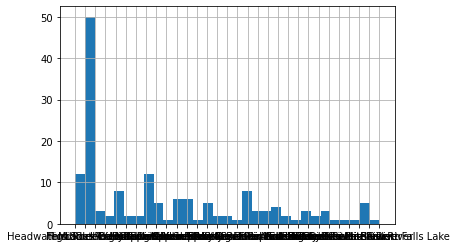

In [164]:
gdf_HUC_animals["HU_10_NAME"].hist(bins=31);

In [170]:
gdf_AC= gdf_HUC_animals.dissolve('HU_10_NAME',aggfunc={'Allowable Count':'sum','HU_10_NAME':'first'})
gdf_AC.head()

,geometry,Allowable Count,HU_10_NAME
HU_10_NAME,,,
Brown Creek,"MULTIPOINT (-80.06322 35.03905, -80.06256 35.0...",10560.0,Brown Creek
Deep Creek,"MULTIPOINT (-80.70830 36.16670, -80.64830 36.0...",17655.0,Deep Creek
Dutchmans Creek,"MULTIPOINT (-80.71830 36.02860, -80.71670 36.0...",1150.0,Dutchmans Creek
Elkin Creek-Yadkin River,"MULTIPOINT (-80.92780 36.32110, -80.90852 36.2...",2151.0,Elkin Creek-Yadkin River
Eury Dam-Little River,POINT (-79.85223 35.44160),7104.0,Eury Dam-Little River


In [180]:
#gdf_AC["HU_10_NAME"].hist(by='Allowable Count', bins=10);

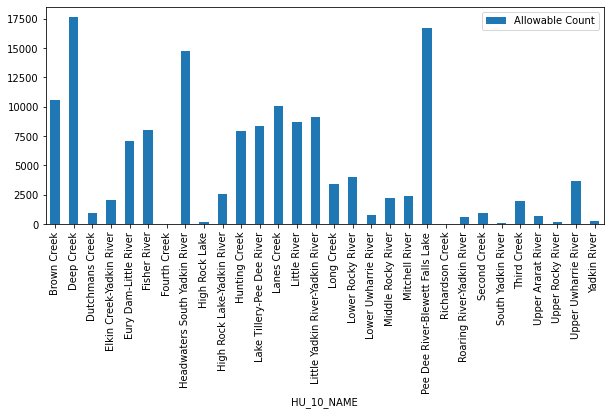

In [12]:
#Create a bar plot of the total # of allowable animals in each HUC 10



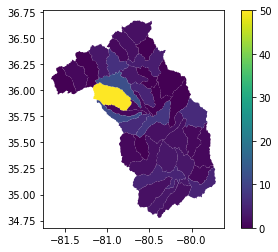

In [181]:
## Plot the # of permits in each HUC 10

#Spatially join the animal permits to each HUC 10 feature
gdf_sjoin = gpd.sjoin(left_df=gdf_HUC10,
                      right_df=gdf_animal,
                      how='left',
                      op='contains')
#Dissolve on HUC 10
gdf_sjoin_HUC10 = gdf_sjoin.dissolve('HU_10_NAME',aggfunc={'Allowable Count':'count','ACRES':'sum'})

#Plot based on Allowable Count attribute
gdf_sjoin_HUC10.plot('Allowable Count',legend=True);

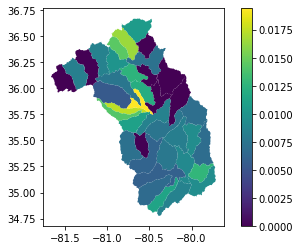

In [14]:
#Plot the # of permits per acre
